<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris=pd.read_csv("iris.csv")

In [2]:
# column names in our dataset
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# no. of data points for each class
# no. of flower for each species
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<h1>2D Scatter Plot</h1>


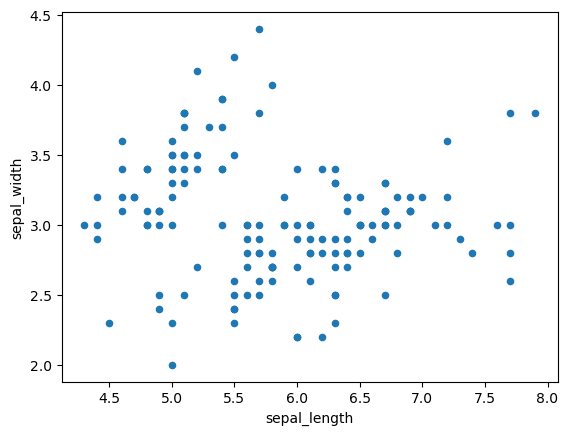

In [5]:
iris.plot('sepal_length','sepal_width',kind='scatter')
plt.show()

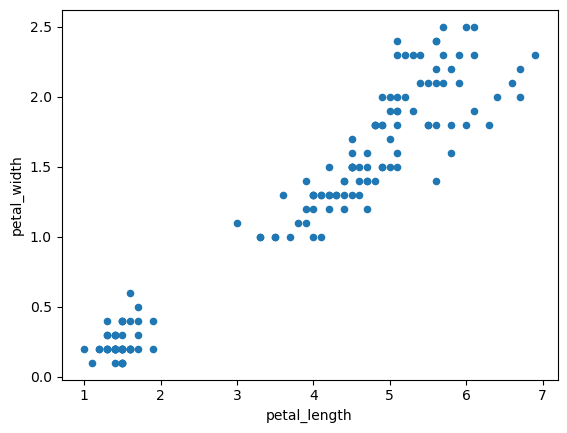

In [6]:
iris.plot('petal_length','petal_width',kind='scatter')
plt.show()

In [7]:
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]

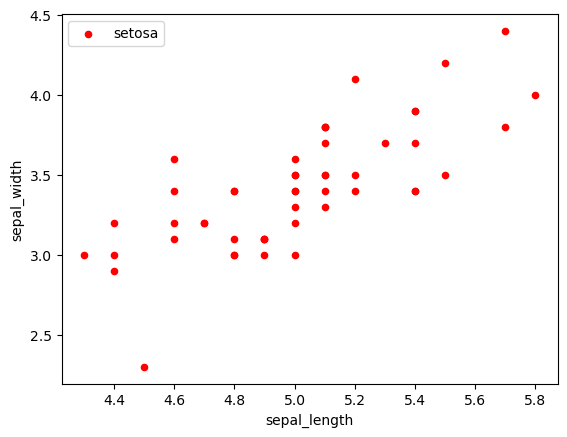

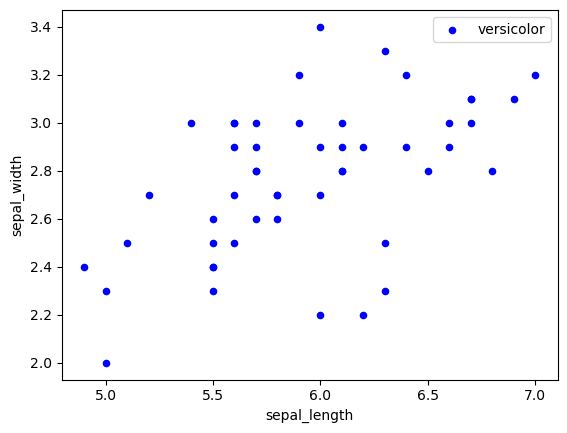

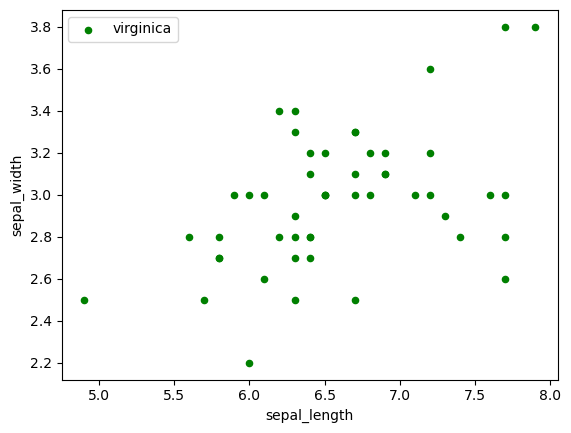

In [8]:
iris_setosa.plot(x="sepal_length", y="sepal_width", kind="scatter", label='setosa',color='r')
iris_versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter", label='versicolor',color='b')
iris_virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", label='virginica', color='g')
plt.show()

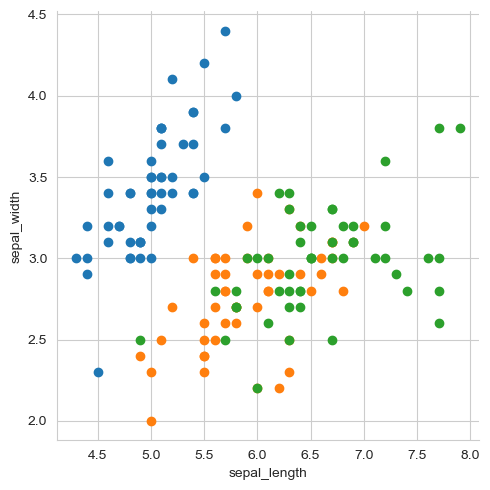

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.FacetGrid(iris, hue='species', height=5).map(plt.scatter, 'sepal_length', 'sepal_width')
plt.show()


<h3>Observations:</h3>

 <h4>1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.</h4>
 <h4>2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.</h4>

<h1>Pair Pot</h1>

C:\Users\tanus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


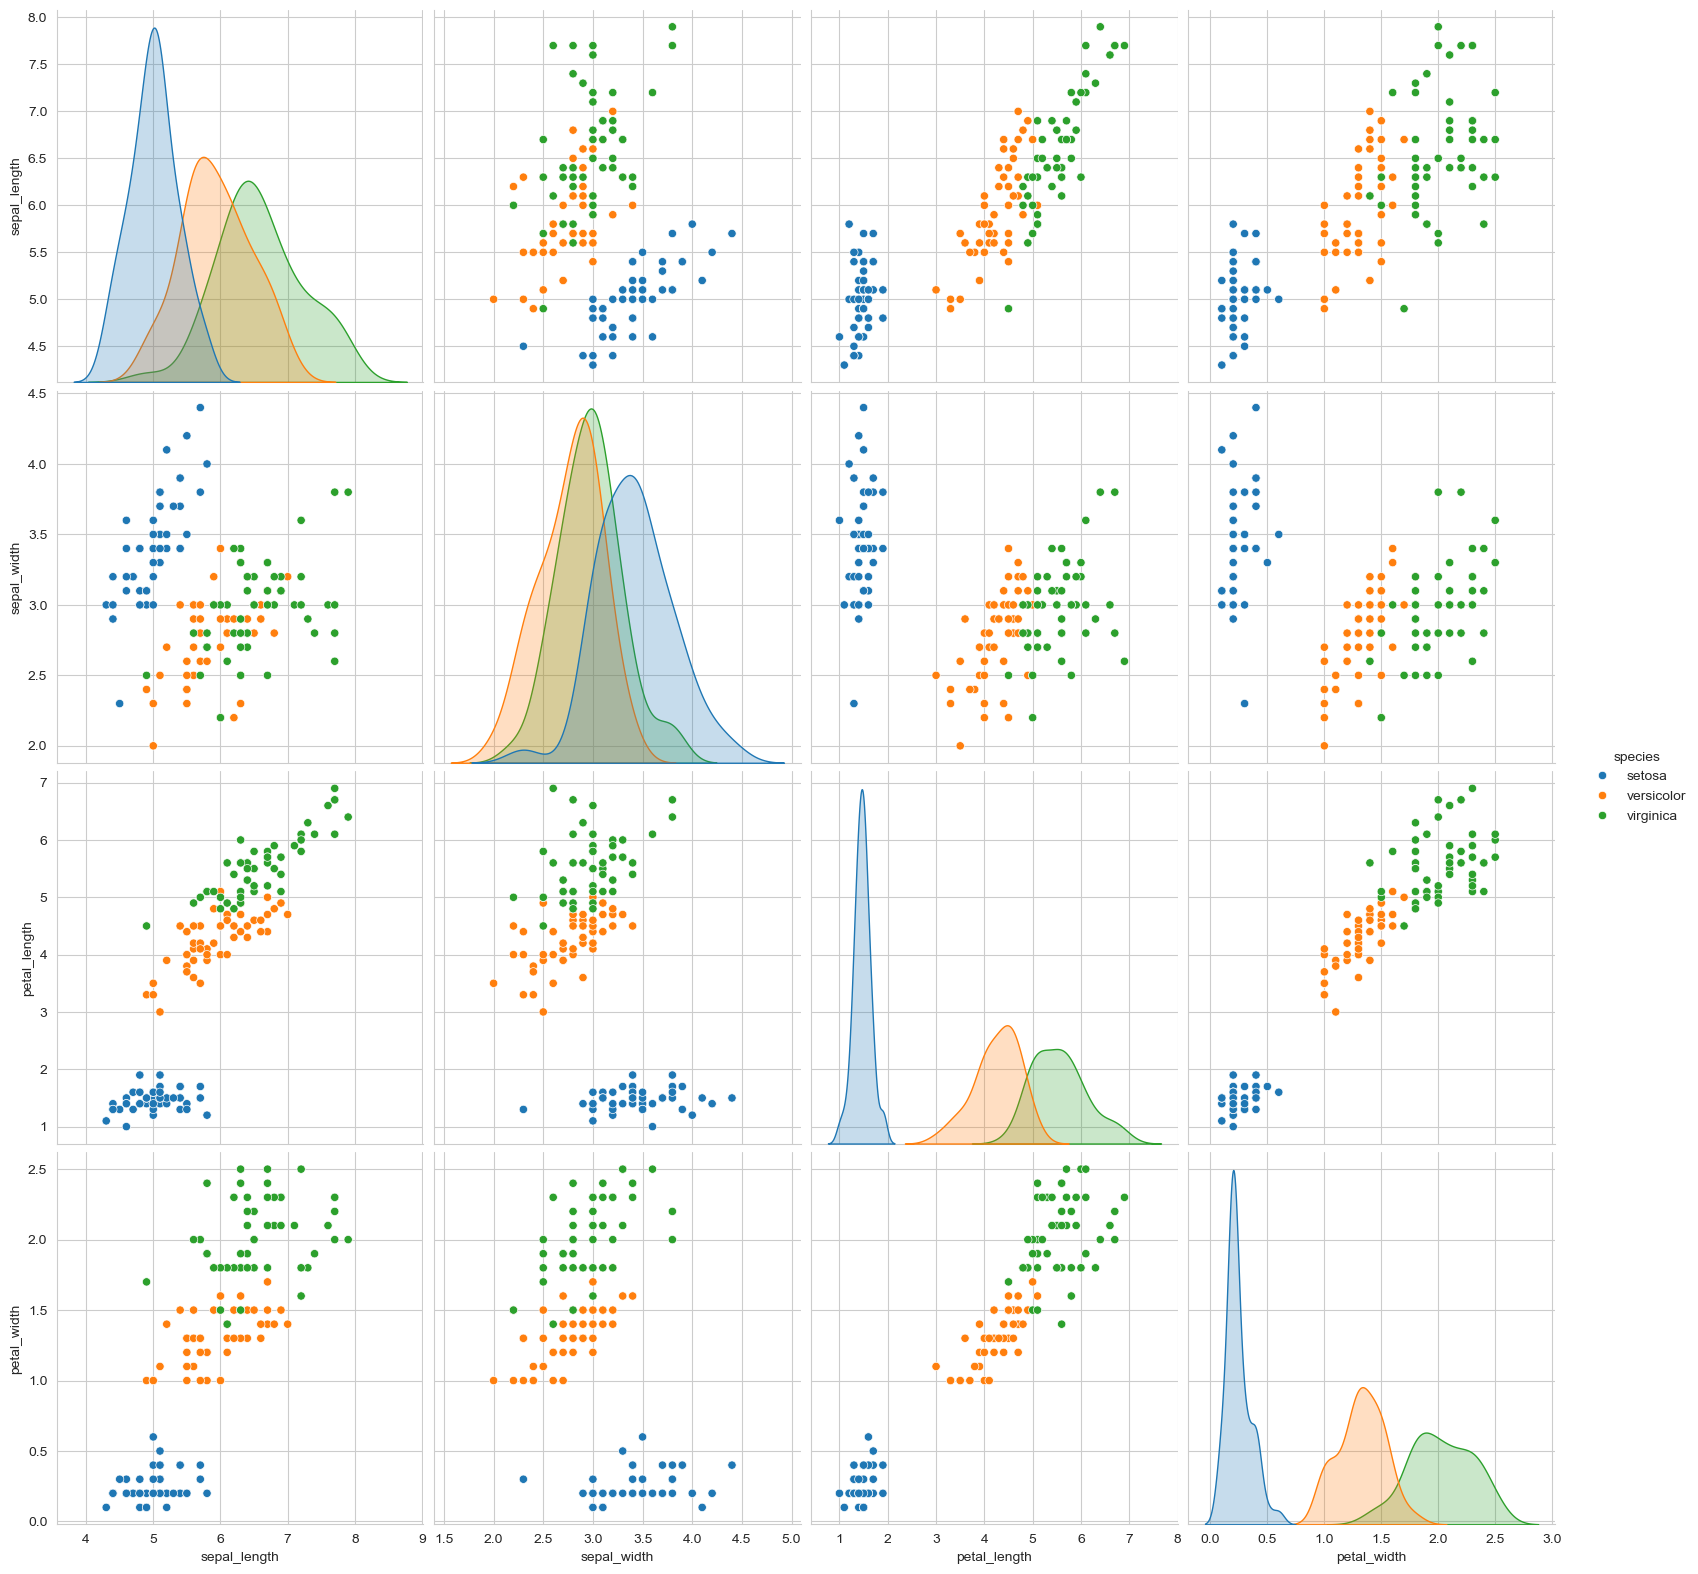

In [15]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='species',size=4)

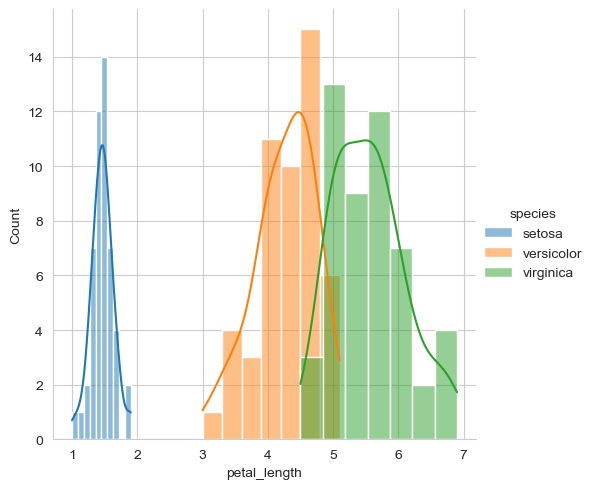

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.FacetGrid(iris, hue='species', height=5) \
   .map(sns.histplot, "petal_length", kde=True) \
   .add_legend()

plt.show()


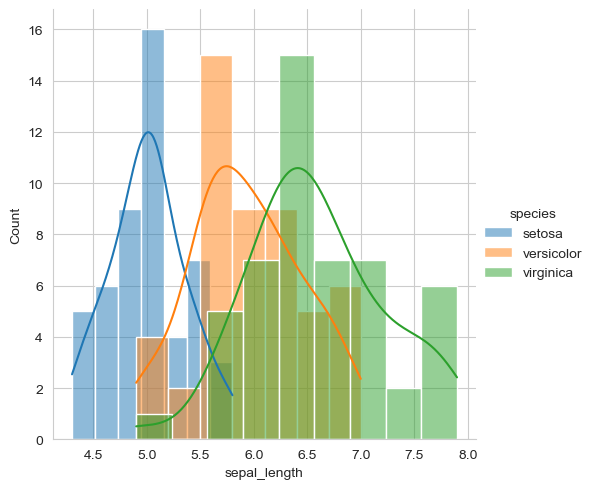

In [20]:
sns.FacetGrid(iris, hue='species', height=5) \
   .map(sns.histplot, 'sepal_length', kde=True) \
   .add_legend()

In [21]:
import numpy as np

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


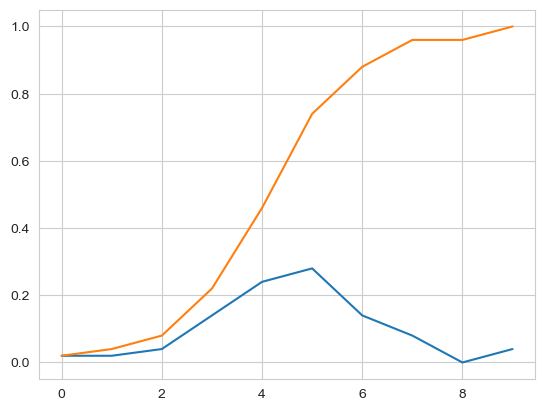

In [22]:
counts,x=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)

cdf=np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.show()

<h1>Mean, Variance and Standard Deviation</h1>

In [23]:
print('Means:')
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))

print('\nstandard deviation:')
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))
print(np.std(iris_virginica["petal_length"]))

Means:
1.464
4.26
5.5520000000000005

standard deviation:
0.17176728442867115
0.4651881339845204
0.5463478745268441


<h1>Median, Percentile, Quantile, IQR, MAD</h1>

In [24]:
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


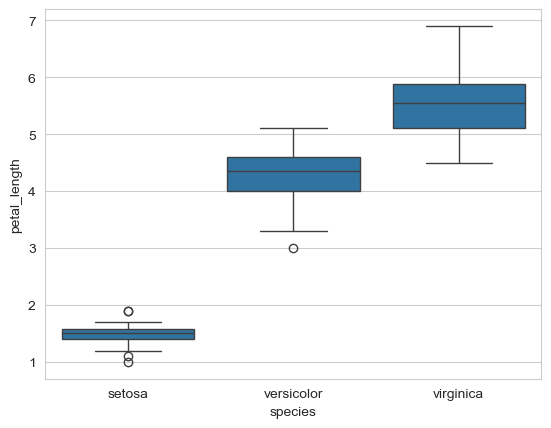

In [25]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.


#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below do not correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

<h1>Multivariate probability density and contour plot</h1>

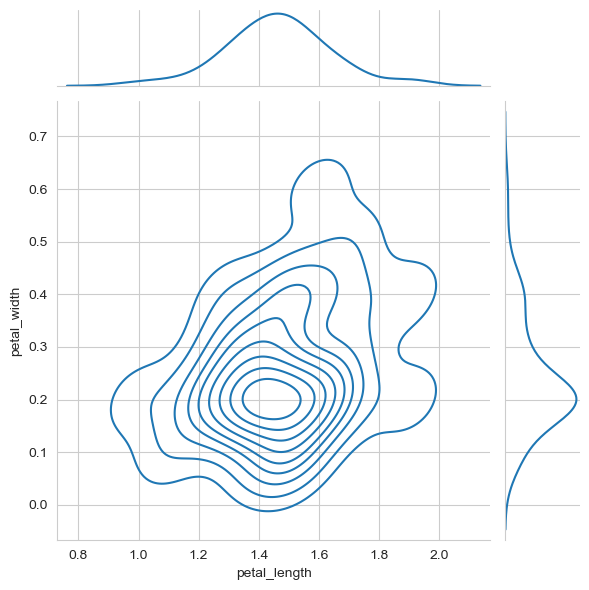

In [28]:
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde")
plt.show()